In [10]:
from zipfile import ZipFile
dataset = '/content/drive/MyDrive/face_mask_archive.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1867.jpg', 'with_mask_2431.jpg', 'with_mask_1516.jpg', 'with_mask_1848.jpg', 'with_mask_39.jpg']
['with_mask_1596.jpg', 'with_mask_3379.jpg', 'with_mask_3361.jpg', 'with_mask_3471.jpg', 'with_mask_2933.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1867.jpg', 'with_mask_2431.jpg', 'with_mask_1516.jpg', 'with_mask_1848.jpg', 'with_mask_39.jpg']
['with_mask_1596.jpg', 'with_mask_3379.jpg', 'with_mask_3361.jpg', 'with_mask_3471.jpg', 'with_mask_2933.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [15]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


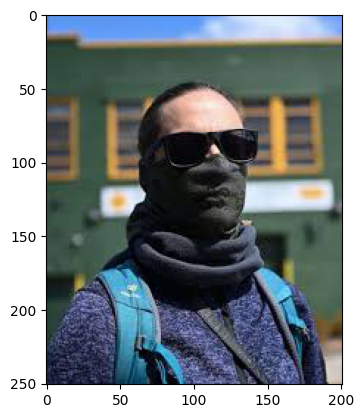

In [19]:
img = mpimg.imread('/content/data/with_mask/with_mask_2.jpg')
imgplot = plt.imshow(img)
plt.show()

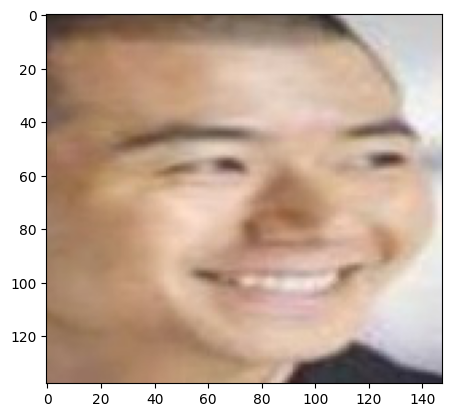

In [20]:
img = mpimg.imread('/content/data/without_mask/without_mask_2.jpg')
imgplot = plt.imshow(img)
plt.show()

In [21]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
X = np.array(data)
Y = np.array(labels)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

In [25]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [26]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [30]:
histinfo = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 165s 957ms/step - loss: 0.4541 - acc: 0.7874 - val_loss: 0.2599 - val_acc: 0.8942
Epoch 2/5
170/170 [==============================] - 164s 966ms/step - loss: 0.2816 - acc: 0.8874 - val_loss: 0.2405 - val_acc: 0.8975
Epoch 3/5
170/170 [==============================] - 160s 944ms/step - loss: 0.2145 - acc: 0.9125 - val_loss: 0.2536 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 167s 984ms/step - loss: 0.1831 - acc: 0.9281 - val_loss: 0.2428 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 163s 958ms/step - loss: 0.1588 - acc: 0.9376 - val_loss: 0.2292 - val_acc: 0.9190


In [31]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 12s 253ms/step - loss: 0.2221 - acc: 0.9080
Test Accuracy = 0.9080079197883606


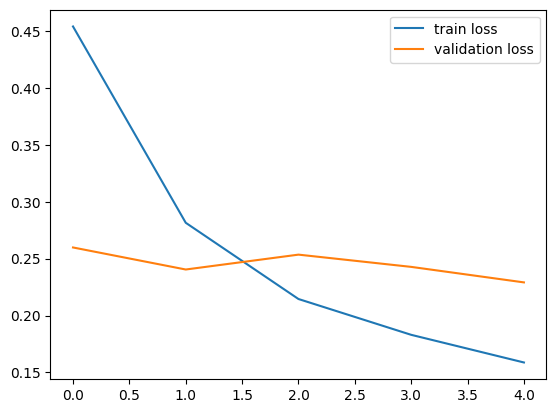

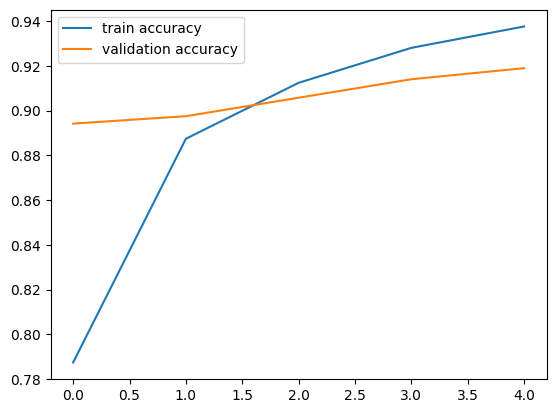

In [32]:
h = histinfo

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/drive/MyDrive/2009926.jpg


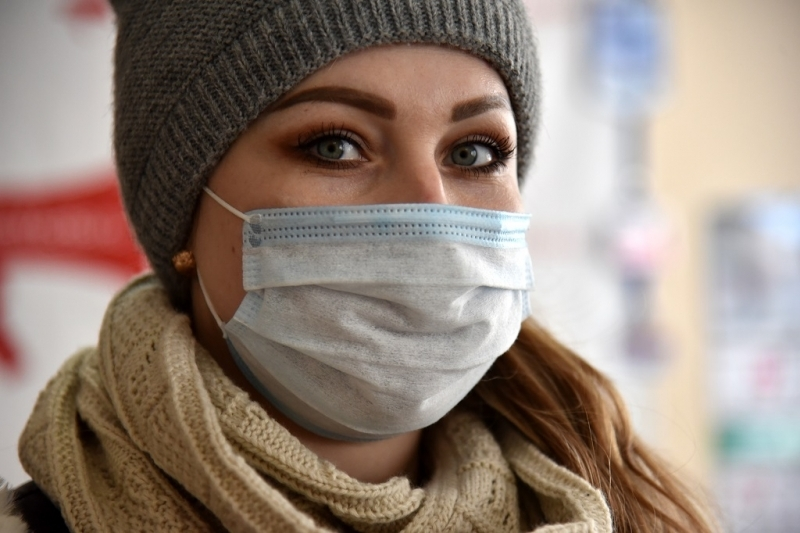

1/1 [==============================] - 0s 162ms/step
[[0.4543127 0.616314 ]]
1
The person in the image is wearing a mask


In [34]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')